In [1]:
import numpy as np

v = np.linspace(-100, 60, 1000)

#CAS
#CAS_JA NOT TUNED
cas_ja = []
for v_ind in v:
    if v_ind < -60:
        cas_ja.append(0)
    else:
        cas_ja.append(1 / ( 1 + np.exp( ( 33.0 - v_ind ) / -8.1 ) ))

#CAS_K NOT SEGREGATED NOT TUNED
cas_k = 1.0/(1.0+(np.exp ((v+60.0)/(6.2))))

#CAT
#CAT_U NOT TUNED
cat_u = []
for v_ind in v:
    if v_ind < -60:
        cat_u.append(0)
    else:
        cat_u.append(1.0/(1.0+ (np.exp ((v_ind+27.1)/(-7.2)))))
        
#CAT_Z NOT SEGREGATED NOT TUNED
cat_z = 1.0/(1.0+(np.exp ((v+32.1)/(5.5)))) 



#KA
#KA_A NOT TUNED
ka_a = []
for v_ind in v:
    if v_ind < -60:
        ka_a.append(0)
    else:
        ka_a.append(1.0/(1.0+(np.exp ((v_ind+27.2)/(-8.7)))))
        
#KA_B NOT SEGREGATED NOT TUNED
ka_b = 1.0/(1.0+ (np.exp ((v+56.9)/(4.9))))

#KCA
#KCA NOT SEGREGATED NOT TUNED
cai_list = np.linspace(0.0005, 0.04, 5)
kca_c_list = []
for cai in cai_list:
    kca_c_list.append(((cai)/(cai + 0.003))*((1.0)/(1+ (np.exp (-(v+28.3)/(12.6))))))

#KDR
#KDR NOT TUNED
kdr_inf = []
for v_ind in v:
    if v_ind < -55.0:
        kdr_inf.append(0)
    else:
        kdr_inf.append(1.0/(1.0 + (np.exp ((v_ind+12.3)/(-11.8)))))

#NA
#NA_M NOT TUNED
na_minf = []
for v_ind in v:
    if v_ind < -55.0:
        na_minf.append(0)
    else:
        na_minf.append(1.0/(1.0+ (np.exp ((v_ind+25.5)/(-5.29)))))

#NA_H NOT SEGREGATED NOT TUNED
na_hinf = 1.0/(1.0+ (np.exp ((v+48.9)/(5.18))))  



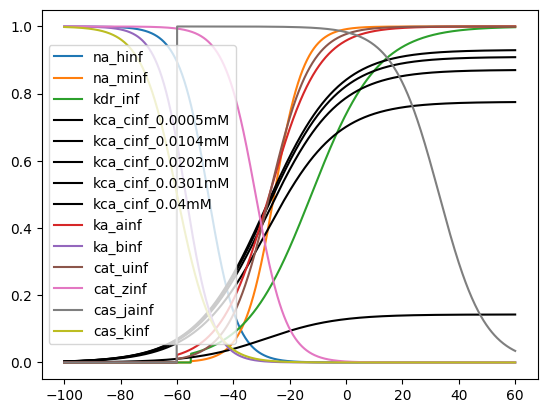

In [2]:
import matplotlib.pyplot as plt

plt.plot(v, na_hinf, label = 'na_hinf')
plt.plot(v, na_minf, label = 'na_minf')
plt.plot(v, kdr_inf, label = 'kdr_inf')
for i in range(len(kca_c_list)):
    plt.plot(v, kca_c_list[i], label = 'kca_cinf_' + str(round(cai_list[i],4)) + 'mM', color='black')
plt.plot(v, ka_a, label = 'ka_ainf')
plt.plot(v, ka_b, label = 'ka_binf')
plt.plot(v, cat_u, label = 'cat_uinf')
plt.plot(v, cat_z, label = 'cat_zinf')
plt.plot(v, cas_ja, label = 'cas_jainf')
plt.plot(v, cas_k, label = 'cas_kinf')
plt.legend()


In [3]:
import os
os.system('nrnivmodl seg_modfiles')

/home/mwsrgf/act-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/mwsrgf/proj/ACT/data/Burster_S3/seg
Mod files: "seg_modfiles/seg_modfiles/capool.mod" "seg_modfiles/seg_modfiles/cas.mod" "seg_modfiles/seg_modfiles/cat.mod" "seg_modfiles/seg_modfiles/ka.mod" "seg_modfiles/seg_modfiles/kca.mod" "seg_modfiles/seg_modfiles/kdr.mod" "seg_modfiles/seg_modfiles/leak.mod" "seg_modfiles/seg_modfiles/na.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


0

In [4]:
# Izhikevich p. 307

import matplotlib.pyplot as plt

from neuron import h
h.load_file('stdrun.hoc')

--No graphics will be displayed.


1.0

In [5]:
h.load_file("template.hoc")
cell = h.Burster()

In [6]:
cell.soma[0](0.5).cm

1.0

In [7]:
# CI
ci = h.IClamp(cell.soma[0](0.5))
ci.amp = 1.8 # (nA)
ci.delay = 50
ci.dur = 150

# V recording
v_seg = h.Vector().record(cell.soma[0](0.5)._ref_v)

In [8]:
h.tstop = 200
h.dt = 0.1
h.steps_per_ms = 1 / h.dt
h.v_init = -50

In [9]:
h.run()

0.0

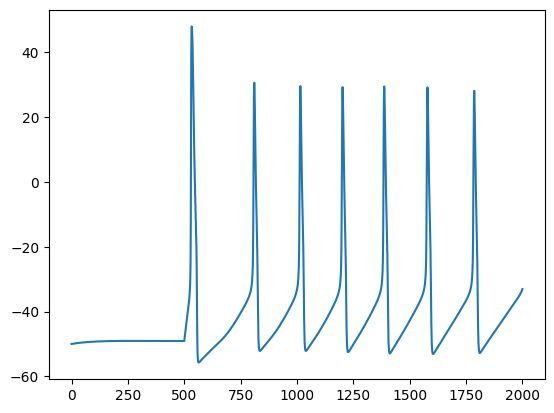

In [10]:
plt.plot(v_seg.as_numpy())
np.save("seg_check.npy",v_seg)